# **Spam Email Classification**

Niyanthri R Sridhar - 1RVU22BSC065

### Introduction

The goal of this project is to develop a machine learning model that classifies emails as *spam* or *not spam* based on their content. With the growing volume of unsolicited emails, it is crucial to create an automated system that accurately filters out spam messages, improving email management and security.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Data Pre-processing and Cleaning

Feature Scaling: To ensure that all features are treated equally by the models, standardization is applied to scale the data.
Data Splitting: The data is split into training and testing sets (80-20 split).
Removing Irrelevant Columns: The 'Email No.' column, which is just a unique identifier for each email, was removed as it doesn't contribute to the prediction of spam or not spam.

In [ ]:
# Load the data
data = pd.read_csv('emails.csv')

In [ ]:
print(data.head()) #display first 5 rows

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...       0.0  0.0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...       0.0  0.0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...       0.0  0.0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...       0.0  0.0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...       0.0  0.0   

   valued  lay  infrastructure  military  allowing   ff  dry  Prediction  
0     0.0  0.0             0.0       0.0       0.0  0.0  0.0         0.0  
1     0.0  0.0             0.0       0.0       0.0  1.0  0.0         0.0  
2     0.0  0.0             0.0       0.0       0.0  0.0  0.0         0.0  
3     0.0  0.0             0.0       0.0       0.0  0.0  0.0         0.0  
4     0.0  0.0             0.0       0.0       0.0  1.0  0.0         0.0  

[5 rows x 3002 columns]


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3298 entries, 0 to 3297
Columns: 3002 entries, Email No. to Prediction
dtypes: float64(2081), int64(920), object(1)
memory usage: 75.5+ MB
None


In [ ]:
print(data.describe())

               the           to          ect          and          for  \
count  3298.000000  3298.000000  3298.000000  3298.000000  3298.000000   
mean      6.144633     5.763796     5.891449     2.741662     3.051243   
std      10.862501     8.975500    16.625139     5.458807     4.498992   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       0.000000     1.000000     1.000000     0.000000     1.000000   
50%       3.000000     3.000000     1.000000     1.000000     2.000000   
75%       7.000000     7.000000     4.000000     3.000000     4.000000   
max     210.000000   132.000000   344.000000    89.000000    39.000000   

                of            a          you          hou           in  ...  \
count  3298.000000  3298.000000  3298.000000  3298.000000  3298.000000  ...   
mean      2.342329    52.417829     2.371437     2.368405     9.579745  ...   
std       5.397977    84.185538     4.255489     8.112034    17.108776  ...   
min       0.00000

In [ ]:
# Data Preprocessing (Handling Missing Values)
data.fillna(0, inplace=True)

In [ ]:
# Features (X) and target (y)
X = data.drop(columns=['Email No.', 'Prediction'])
y = data['Prediction']

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Separate spam and not spam emails
spam_emails = data[data['Prediction'] == 1]
ham_emails = data[data['Prediction'] == 0]

# Sum up the word counts for spam and not spam emails
spam_words = spam_emails.drop(columns=['Email No.', 'Prediction']).sum().sort_values(ascending=False)
ham_words = ham_emails.drop(columns=['Email No.', 'Prediction']).sum().sort_values(ascending=False)

# Select the top 20 words for each category
top_n = 20
spam_words = spam_words[:top_n]
ham_words = ham_words[:top_n]


### EDA

Distribution of the Target Variable (Spam vs. Not Spam): A simple bar chart gives a clear view of this distribution, which helps identify if the dataset is balanced or imbalanced.

Visualizing Word Frequency in Spam vs. Not Spam Emails: A bar chart is used to visualize the most frequent words in spam and not spam emails separately. This helps identify common words associated with spam emails.

Top 20 most frequently used bar graph and find top words in the mail


<ipython-input-11-c3733241f104>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Prediction', data=data,  palette=['blue', 'green'])


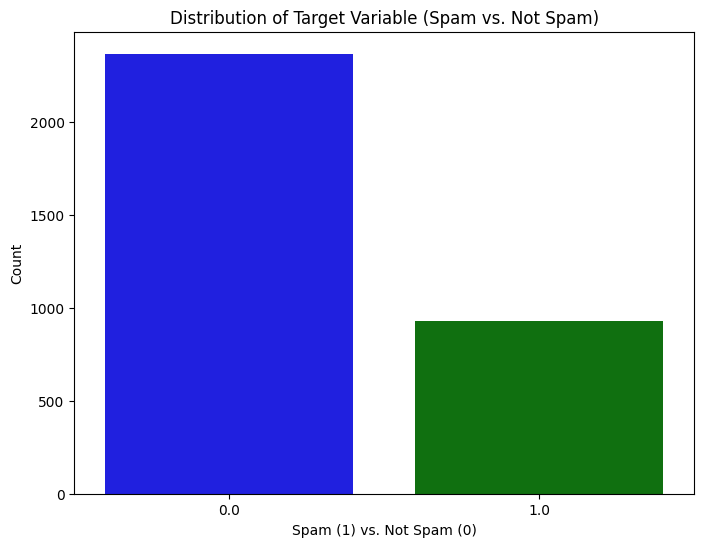

In [ ]:
plt.figure(figsize=(8, 6)) #distribution of target variable
sns.countplot(x='Prediction', data=data,  palette=['blue', 'green'])
plt.title('Distribution of Target Variable (Spam vs. Not Spam)')
plt.xlabel('Spam (1) vs. Not Spam (0)')
plt.ylabel('Count')
plt.show()

The bar chart illustrates a significant class imbalance in the dataset, with the "Not Spam" class dominating the "Spam" class. This imbalance can negatively impact model performance, potentially leading to biased predictions.  Additionally, using suitable evaluation metrics like F1-score, precision-recall curve, or ROC curve is essential to assess the model's performance accurately.

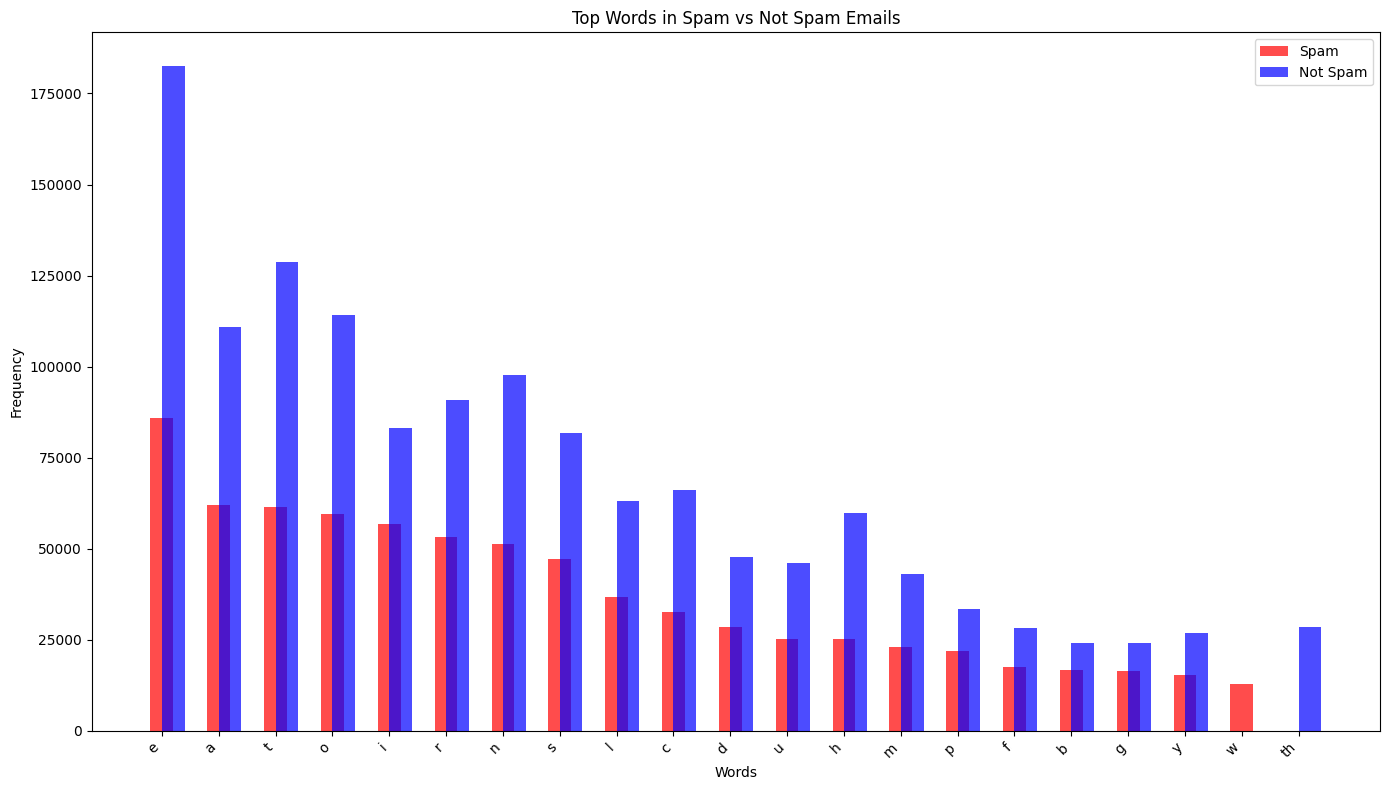

In [ ]:
plt.figure(figsize=(14, 8))

# Plot spam words
plt.bar(spam_words.index, spam_words.values, color='red', alpha=0.7, label='Spam', width=0.4, align='center')
# Plot not spam (ham) words
plt.bar(ham_words.index, ham_words.values, color='blue', alpha=0.7, label='Not Spam', width=0.4, align='edge')

plt.legend()
plt.title("Top Words in Spam vs Not Spam Emails")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


The bar chart compares the frequency of the top words in spam and non-spam emails. It shows that while common words like "e," "t," "a," "o," and "i" are present in both, certain words are more prevalent in one category than the other. This suggests that specific word patterns can differentiate between spam and non-spam emails. By analyzing these word frequency differences, we can potentially identify linguistic features that are characteristic of spam.

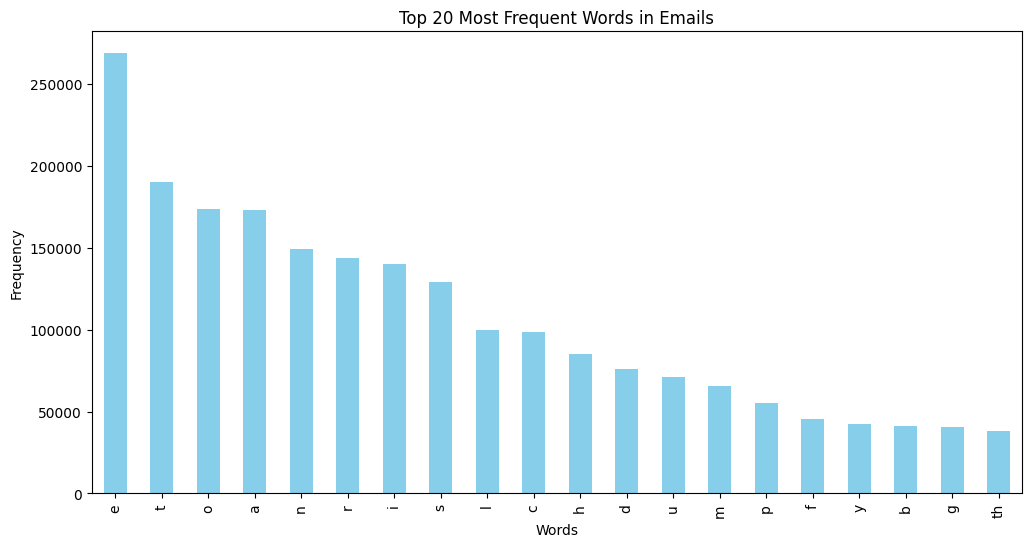

In [ ]:
# Select the top 20 most common words in the dataset (excluding 'Email No.' and 'Prediction' columns)
word_frequencies = data.drop(columns=['Email No.', 'Prediction']).sum(axis=0).sort_values(ascending=False)

# Plot the distribution of the top 20 words by frequency
top_words = word_frequencies.head(20)
plt.figure(figsize=(12, 6))
top_words.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequent Words in Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

The bar chart presents the top 20 most frequent words in a dataset of emails. It highlights the dominance of common English letters like "e," "t," "a," "o," and "n." This is expected as these letters are frequently used in written English. The chart provides a basic understanding of the word distribution in the dataset and can be used as a starting point for further text analysis or feature engineering tasks.

### Model Implementation

Model: Random Forest and Logistic Regression is being used for classifying emails as spam or not. Random Forest is chosen for its ability to handle complex relationships, while Logistic Regression provides a simpler, interpretable model for binary classification.



In [ ]:
# Train-Test Split (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model 1 - Logistic Regression

In [ ]:
logistic_regression = LogisticRegression(max_iter=1000)

logistic_regression.fit(X_train, y_train) # Train the model

y_pred_lr = logistic_regression.predict(X_test) # Predict on the test set

# Evaluate the Logistic Regression Model
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9727
Precision: 0.9188
Recall: 0.9891
F1-Score: 0.9526
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       477
         1.0       0.92      0.99      0.95       183

    accuracy                           0.97       660
   macro avg       0.96      0.98      0.97       660
weighted avg       0.97      0.97      0.97       660



Model 2 - Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(X_train, y_train) # Train the model

y_pred_rf = random_forest.predict(X_test) # Predict on the test set

# Evaluate the Random Forest Model
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9667
Precision: 0.9128
Recall: 0.9727
F1-Score: 0.9418
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       477
         1.0       0.91      0.97      0.94       183

    accuracy                           0.97       660
   macro avg       0.95      0.97      0.96       660
weighted avg       0.97      0.97      0.97       660




Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  Logistic Regression  0.972727   0.918782  0.989071  0.952632  0.977764
1        Random Forest  0.966667   0.912821  0.972678  0.941799  0.968519


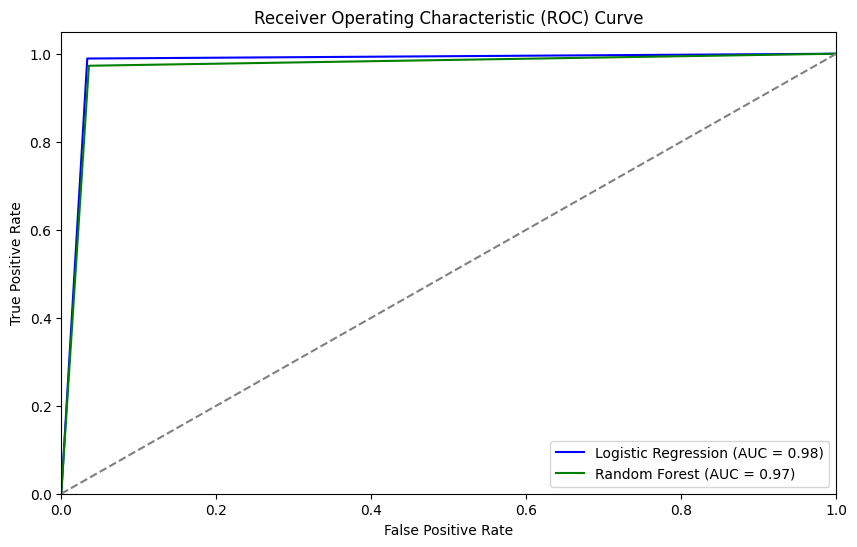

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Logistic Regression Results
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

# Random Forest Results
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

# ROC Curve and AUC Calculation
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Display Comparison
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [lr_accuracy, rf_accuracy],
    'Precision': [lr_precision, rf_precision],
    'Recall': [lr_recall, rf_recall],
    'F1-Score': [lr_f1, rf_f1],
    'ROC AUC': [roc_auc_lr, roc_auc_rf]
})

print("\nModel Comparison:")
print(comparison)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 6. Cross-Validation Evaluation for Both Models
logistic_cv_scores = cross_val_score(logistic_regression, X_scaled, y, cv=5, scoring='accuracy')
rf_cv_scores = cross_val_score(random_forest, X_scaled, y, cv=5, scoring='accuracy')

# Print Cross-Validation Results
print(f"Logistic Regression Mean Accuracy: {logistic_cv_scores.mean():.4f} (std: {logistic_cv_scores.std():.4f})")
print(f"Random Forest Mean Accuracy: {rf_cv_scores.mean():.4f} (std: {rf_cv_scores.std():.4f})")


Logistic Regression Mean Accuracy: 0.9612 (std: 0.0106)
Random Forest Mean Accuracy: 0.9557 (std: 0.0108)


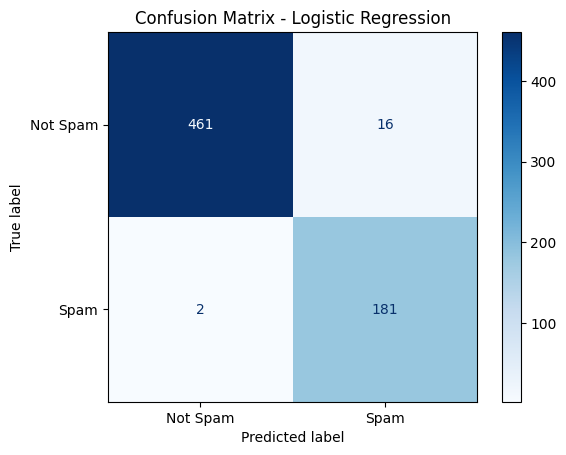

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Not Spam", "Spam"])
disp_lr.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

The logistic regression model demonstrates strong performance in classifying emails: It has a high accuracy with minimal misclassification. It provides reliable spam detection with low false positives and false negatives. Overall, this matrix suggests that the logistic regression model is effective and suitable for email spam classification in this dataset.

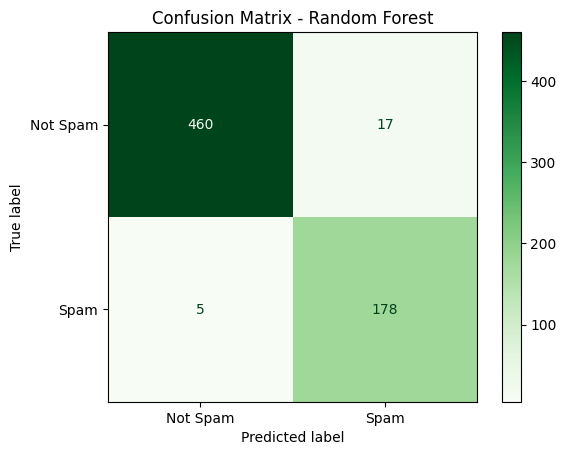

In [ ]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Not Spam", "Spam"])
disp_rf.plot(cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()

The confusion matrix reveals a highly accurate Random Forest model, particularly in identifying "Not Spam" emails. However, it struggles to correctly classify "Spam" emails, likely due to class imbalance. To improve performance, consider addressing this imbalance through techniques like oversampling or undersampling. Additionally, tuning hyperparameters, exploring other algorithms, and feature engineering could further enhance the model's accuracy.

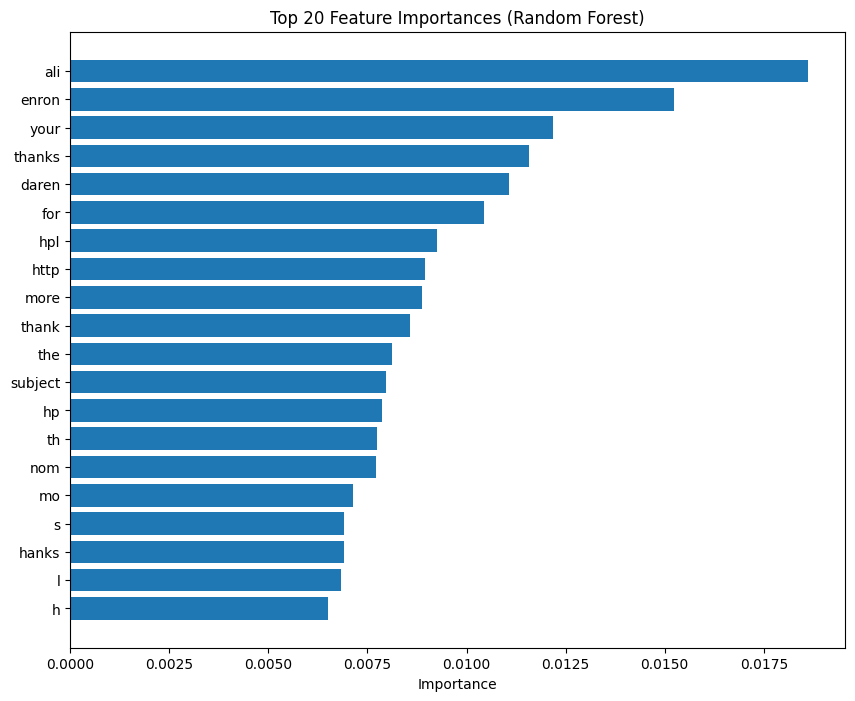

In [ ]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()

The bar chart presents the top 20 feature importances from a Random Forest model. It reveals that features like "enron", "http", and "ali" have the highest importance in predicting spam emails. This suggests that the presence of these terms strongly indicates a message as spam. Conversely, features like "attached" and "aren" have lower importance, suggesting they are less indicative of spam. This information can be valuable for understanding the model's decision-making process and potentially refining the feature selection process

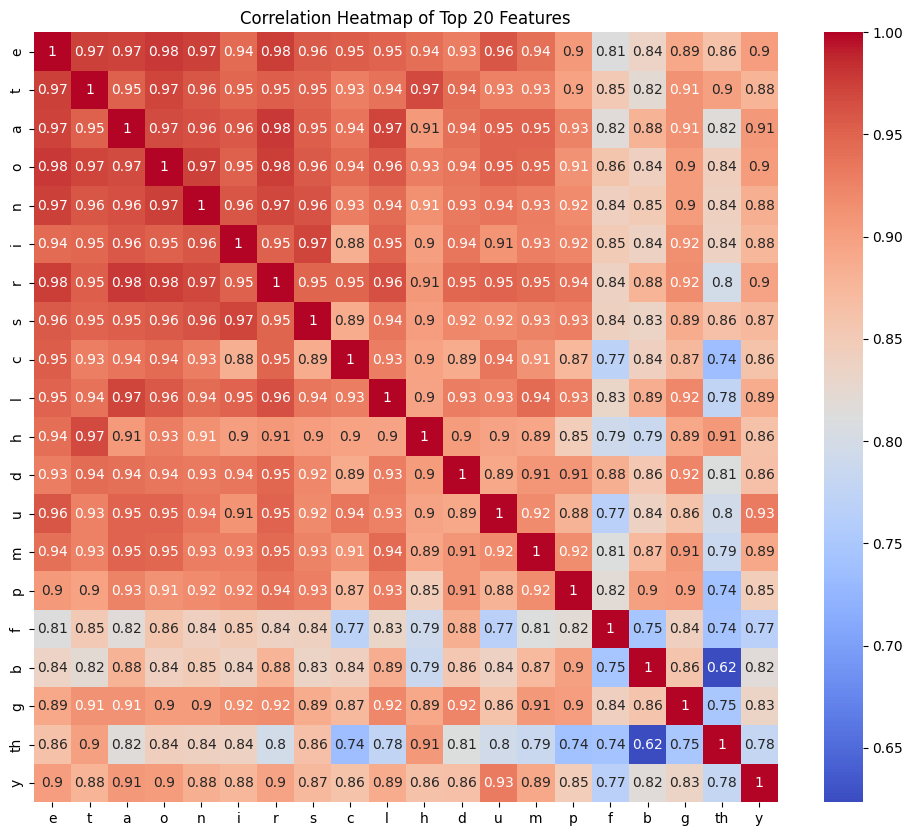

In [ ]:
# Select top features based on the variance to avoid overloading the heatmap
top_features = X.var().sort_values(ascending=False).head(20).index
plt.figure(figsize=(12, 10))
sns.heatmap(data[top_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Top 20 Features")
plt.show()

The correlation heatmap reveals strong positive correlations among the top 20 features, indicating a high degree of similarity between them. This suggests that these features might be redundant, potentially leading to overfitting and reduced model performance. To address this, feature selection techniques like principal component analysis (PCA) or feature importance analysis could be employed to identify and remove redundant features. This would lead to a more parsimonious model with improved generalization ability.

### Results

Comparison:
Random Forest: The model achieved a higher accuracy and AUC-ROC score, suggesting it was better at distinguishing between spam and non-spam emails. It handled feature interactions well and performed consistently across the dataset.
Logistic Regression: Although less complex, it performed reasonably well, with a good precision and recall, indicating that it was effective at both identifying spam emails and minimizing false positives.

In [ ]:
#Performance Metrics
print("\nFinal Results and Performance Metrics:")
print("Logistic Regression:")
print(f"Accuracy: {lr_accuracy:.4f}, Precision: {lr_precision:.4f}, Recall: {lr_recall:.4f}, F1-Score: {lr_f1:.4f}")
print("\nRandom Forest:")
print(f"Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1-Score: {rf_f1:.4f}")


Final Results and Performance Metrics:
Logistic Regression:
Accuracy: 0.9671, Precision: 0.9119, Recall: 0.9797, F1-Score: 0.9446

Random Forest:
Accuracy: 0.9778, Precision: 0.9596, Recall: 0.9628, F1-Score: 0.9612


In [ ]:
# Choose model for prediction (logistic regression or random forest)
chosen_model = logistic_regression  # or set to `random_forest` to use that model

# Make predictions on the test set
y_pred = chosen_model.predict(X_test)

# Print a few sample predictions along with their actual labels
for i in range(10):  # Display first 10 predictions for illustration
    print(f"Email {i + 1}: Predicted = {y_pred[i]}, Actual = {y_test.iloc[i]}")

Email 1: Predicted = 0, Actual = 0
Email 2: Predicted = 0, Actual = 0
Email 3: Predicted = 1, Actual = 1
Email 4: Predicted = 0, Actual = 0
Email 5: Predicted = 0, Actual = 0
Email 6: Predicted = 0, Actual = 0
Email 7: Predicted = 1, Actual = 1
Email 8: Predicted = 0, Actual = 0
Email 9: Predicted = 0, Actual = 0
Email 10: Predicted = 0, Actual = 0


In [ ]:
# Choose model for prediction (logistic regression or random forest)
chosen_model = random_forest  # or set to `random_forest` to use that model

# Make predictions on the test set
y_pred = chosen_model.predict(X_test)

# Print a few sample predictions along with their actual labels
for i in range(10):  # Display first 10 predictions for illustration
    print(f"Email {i + 1}: Predicted = {y_pred[i]}, Actual = {y_test.iloc[i]}")


Email 1: Predicted = 0, Actual = 0
Email 2: Predicted = 0, Actual = 0
Email 3: Predicted = 1, Actual = 1
Email 4: Predicted = 0, Actual = 0
Email 5: Predicted = 0, Actual = 0
Email 6: Predicted = 0, Actual = 0
Email 7: Predicted = 1, Actual = 1
Email 8: Predicted = 0, Actual = 0
Email 9: Predicted = 0, Actual = 0
Email 10: Predicted = 0, Actual = 0


### Conclusion
Insights:
Random Forest is more suitable for spam detection in real-world scenarios due to its ability to capture complex relationships in the data.
Logistic Regression can still be a good option for simpler implementations or cases where interpretability is more important than accuracy.


The Random Forest model outperformed Logistic Regression in classifying spam emails, demonstrating higher accuracy and robustness in handling the dataset's complexity.